In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# %matplotlib qt

## The backpropagation algorithm is implemented as follows:

In [2]:
""" 
The update equations are mentioned as follows:
1) Weight update from hidden to output layer: W_jh = W_jh - eta * ( S(Z)^T . {(S(Y)-d) * Sd_Y} ) 
2) Weight update from input to hidden layer: W_hi = W_hi - eta * X^T . ({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z) 
3) Bias updates for output layer: bo = bo - eta * sum({(S(Y)-d) * Sd_Y})
4) Bias updates for hidden layer: bh = bh - eta * sum({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z )

where, * = elementwise product, . = dot product, ()^T = transpose operation,
eta = learning rate, Z = hidden layer activation potential, S(Z) = hidden layer activation,
Y = output layer activation potential, S(Y) = output layer activation, Sd_Z = derivative of S(Z), 
Sd_Y = derivative of S(Y)
"""

def forward_pass(X, W_hi, W_jh, b_h, b_o):
      
    # hidden layer
    Z = np.dot(X, W_hi) + b_h  # hidden layer activation potential
    S_Z = sigmod_fun(Z)       # hidden layer output
    
    # Output layer
    Y = np.dot(S_Z, W_jh) + b_o  # output layer activation potential
    S_Y = sigmod_fun(Y)          # output layer output
    return Z, Y, S_Z, S_Y

def back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, p, lam):
    e = (S_Y - d)/X.shape[1]
    Sd_Y = sigmod_deriv_fun(Y) # Compute the derivative of the S(Y)
    Sd_Z = sigmod_deriv_fun(Z) # Compute the derivative of the S(Z)
    sc_error = e*Sd_Y          # Compute the scaled error 
    
    # compute p_hat
    p_hat = np.sum(S_Z, axis = 1) / S_Z.shape[1]  
    
    # compute KL divergence and its gradient
#     KL_div = lam*np.sum(p*np.log(p/p_hat) + 
#                         (1 - p)*np.log((1 - p)/(1 - p_hat)))
    KL_div_d = lam*(-(p/p_hat) + ((1 - p) / (1 - p_hat)))    
    KL_div_d = np.reshape(KL_div_d, (KL_div_d.shape[0], 1))/X.shape[1]
    
    # output bias update
    b_o = b_o - eta*np.sum(sc_error)
    
    # hidden bias update
    b_h = b_h - eta*np.sum( (np.dot(sc_error, W_jh.T) + KL_div_d  )*Sd_Z )     
                                          
    # weight update input to hidden
    W_hi = W_hi - eta*np.dot(X.T,((np.dot(sc_error, W_jh.T) + KL_div_d  )*Sd_Z))
    
    # weight update hidden to output
    W_jh = W_jh - eta * np.dot(S_Z.T,sc_error) 

    return W_jh, W_hi, b_o, b_h
def sigmod_fun(X):
    return 1/(1+np.exp(-X))

def sigmod_deriv_fun(X):
    X_sig = sigmod_fun(X)
    Z = X_sig*(1-X_sig)
    return Z


## Training:

In [3]:
c = np.load('mnist_14_14.npz') 
X_train = c['x_train']
X = X_train
d = X
X_test = c['x_test']
X_test = X_test
d_test = X_test

epochs = 10000
eta = 0.1
p = 0.1432
lam = 0.5

num_in_node, num_hid_node, num_op_node = X_train.shape[1],X_train.shape[1]+10,X_train.shape[1]
r = math.sqrt(6) / math.sqrt(num_in_node + num_hid_node + 1) 
# initialize weights and biases
W_hi = np.random.uniform(low = -r, high = r, size = (num_in_node,num_hid_node))
W_jh =  np.random.uniform(low = -r, high = r, size = (num_hid_node,num_op_node))
b_h =  np.random.uniform(size = (1,num_hid_node))
b_o =  np.random.uniform(size = (1,num_op_node))

# Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o)
# back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, p, lam)

Wo = np.zeros((num_hid_node,num_op_node))
error_epoch = np.zeros((epochs,1))
print('training in progress..............')
for i in range(epochs):
    Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o)
    W_jh, W_hi, b_o, b_h = back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, p, lam)
    error = ((S_Y - d)*(S_Y - d)).flatten()
    error_epoch[i] = np.sum(error)/len(error)
    print('iter = ', i, ', error = ', error_epoch[i])
        
print('training completed ...............')
        


training in progress..............
iter =  0 , error =  [0.33339806]
iter =  1 , error =  [0.09066832]
iter =  2 , error =  [0.09052565]
iter =  3 , error =  [0.0904391]
iter =  4 , error =  [0.09131159]
iter =  5 , error =  [0.09010899]
iter =  6 , error =  [0.09084075]
iter =  7 , error =  [0.08986776]
iter =  8 , error =  [0.09070406]
iter =  9 , error =  [0.08925208]
iter =  10 , error =  [0.08974782]
iter =  11 , error =  [0.08899449]
iter =  12 , error =  [0.08904674]
iter =  13 , error =  [0.08796519]
iter =  14 , error =  [0.08791386]
iter =  15 , error =  [0.08654118]
iter =  16 , error =  [0.08602327]
iter =  17 , error =  [0.08432175]
iter =  18 , error =  [0.08287175]
iter =  19 , error =  [0.0804712]
iter =  20 , error =  [0.07746036]
iter =  21 , error =  [0.07393459]
iter =  22 , error =  [0.06886917]
iter =  23 , error =  [0.06631808]
iter =  24 , error =  [0.06139736]
iter =  25 , error =  [0.06317669]
iter =  26 , error =  [0.05818862]
iter =  27 , error =  [0.0611292

iter =  241 , error =  [0.0426203]
iter =  242 , error =  [0.0419518]
iter =  243 , error =  [0.0426115]
iter =  244 , error =  [0.04188462]
iter =  245 , error =  [0.04258404]
iter =  246 , error =  [0.04180465]
iter =  247 , error =  [0.04252874]
iter =  248 , error =  [0.04170795]
iter =  249 , error =  [0.04243995]
iter =  250 , error =  [0.04159302]
iter =  251 , error =  [0.04231689]
iter =  252 , error =  [0.04146091]
iter =  253 , error =  [0.04216341]
iter =  254 , error =  [0.04131467]
iter =  255 , error =  [0.04198642]
iter =  256 , error =  [0.04115835]
iter =  257 , error =  [0.04179398]
iter =  258 , error =  [0.04099607]
iter =  259 , error =  [0.04159362]
iter =  260 , error =  [0.04083138]
iter =  261 , error =  [0.04139144]
iter =  262 , error =  [0.04066698]
iter =  263 , error =  [0.04119177]
iter =  264 , error =  [0.0405047]
iter =  265 , error =  [0.04099739]
iter =  266 , error =  [0.04034562]
iter =  267 , error =  [0.0408098]
iter =  268 , error =  [0.0401902

iter =  485 , error =  [0.0299498]
iter =  486 , error =  [0.02966446]
iter =  487 , error =  [0.02988236]
iter =  488 , error =  [0.02959888]
iter =  489 , error =  [0.02981533]
iter =  490 , error =  [0.02953372]
iter =  491 , error =  [0.02974872]
iter =  492 , error =  [0.02946896]
iter =  493 , error =  [0.02968253]
iter =  494 , error =  [0.02940462]
iter =  495 , error =  [0.02961676]
iter =  496 , error =  [0.02934069]
iter =  497 , error =  [0.02955143]
iter =  498 , error =  [0.02927716]
iter =  499 , error =  [0.02948653]
iter =  500 , error =  [0.02921404]
iter =  501 , error =  [0.02942206]
iter =  502 , error =  [0.02915133]
iter =  503 , error =  [0.02935803]
iter =  504 , error =  [0.02908903]
iter =  505 , error =  [0.02929444]
iter =  506 , error =  [0.02902712]
iter =  507 , error =  [0.02923129]
iter =  508 , error =  [0.02896562]
iter =  509 , error =  [0.02916859]
iter =  510 , error =  [0.02890452]
iter =  511 , error =  [0.02910632]
iter =  512 , error =  [0.028

iter =  724 , error =  [0.02402959]
iter =  725 , error =  [0.02419592]
iter =  726 , error =  [0.02399465]
iter =  727 , error =  [0.02416084]
iter =  728 , error =  [0.02395985]
iter =  729 , error =  [0.02412593]
iter =  730 , error =  [0.02392519]
iter =  731 , error =  [0.02409118]
iter =  732 , error =  [0.02389067]
iter =  733 , error =  [0.0240566]
iter =  734 , error =  [0.02385629]
iter =  735 , error =  [0.02402217]
iter =  736 , error =  [0.02382205]
iter =  737 , error =  [0.0239879]
iter =  738 , error =  [0.02378794]
iter =  739 , error =  [0.02395379]
iter =  740 , error =  [0.02375397]
iter =  741 , error =  [0.02391983]
iter =  742 , error =  [0.02372013]
iter =  743 , error =  [0.02388602]
iter =  744 , error =  [0.02368642]
iter =  745 , error =  [0.02385237]
iter =  746 , error =  [0.02365285]
iter =  747 , error =  [0.02381886]
iter =  748 , error =  [0.0236194]
iter =  749 , error =  [0.02378549]
iter =  750 , error =  [0.02358608]
iter =  751 , error =  [0.02375

iter =  960 , error =  [0.02060189]
iter =  961 , error =  [0.02076407]
iter =  962 , error =  [0.02057764]
iter =  963 , error =  [0.02073983]
iter =  964 , error =  [0.02055347]
iter =  965 , error =  [0.02071565]
iter =  966 , error =  [0.02052937]
iter =  967 , error =  [0.02069155]
iter =  968 , error =  [0.02050533]
iter =  969 , error =  [0.0206675]
iter =  970 , error =  [0.02048135]
iter =  971 , error =  [0.02064352]
iter =  972 , error =  [0.02045745]
iter =  973 , error =  [0.0206196]
iter =  974 , error =  [0.0204336]
iter =  975 , error =  [0.02059574]
iter =  976 , error =  [0.02040982]
iter =  977 , error =  [0.02057194]
iter =  978 , error =  [0.02038611]
iter =  979 , error =  [0.0205482]
iter =  980 , error =  [0.02036246]
iter =  981 , error =  [0.02052452]
iter =  982 , error =  [0.02033886]
iter =  983 , error =  [0.02050089]
iter =  984 , error =  [0.02031534]
iter =  985 , error =  [0.02047732]
iter =  986 , error =  [0.02029187]
iter =  987 , error =  [0.020453

iter =  1193 , error =  [0.01830588]
iter =  1194 , error =  [0.01814958]
iter =  1195 , error =  [0.01828753]
iter =  1196 , error =  [0.01813153]
iter =  1197 , error =  [0.01826922]
iter =  1198 , error =  [0.01811352]
iter =  1199 , error =  [0.01825094]
iter =  1200 , error =  [0.01809555]
iter =  1201 , error =  [0.01823269]
iter =  1202 , error =  [0.01807762]
iter =  1203 , error =  [0.01821448]
iter =  1204 , error =  [0.01805972]
iter =  1205 , error =  [0.01819631]
iter =  1206 , error =  [0.01804186]
iter =  1207 , error =  [0.01817816]
iter =  1208 , error =  [0.01802404]
iter =  1209 , error =  [0.01816005]
iter =  1210 , error =  [0.01800625]
iter =  1211 , error =  [0.01814197]
iter =  1212 , error =  [0.0179885]
iter =  1213 , error =  [0.01812393]
iter =  1214 , error =  [0.01797078]
iter =  1215 , error =  [0.01810592]
iter =  1216 , error =  [0.01795311]
iter =  1217 , error =  [0.01808794]
iter =  1218 , error =  [0.01793546]
iter =  1219 , error =  [0.01807]
iter 

iter =  1425 , error =  [0.01638849]
iter =  1426 , error =  [0.01627435]
iter =  1427 , error =  [0.01637364]
iter =  1428 , error =  [0.01625983]
iter =  1429 , error =  [0.0163588]
iter =  1430 , error =  [0.01624533]
iter =  1431 , error =  [0.01634399]
iter =  1432 , error =  [0.01623086]
iter =  1433 , error =  [0.0163292]
iter =  1434 , error =  [0.01621642]
iter =  1435 , error =  [0.01631444]
iter =  1436 , error =  [0.01620199]
iter =  1437 , error =  [0.0162997]
iter =  1438 , error =  [0.01618759]
iter =  1439 , error =  [0.01628499]
iter =  1440 , error =  [0.01617321]
iter =  1441 , error =  [0.01627029]
iter =  1442 , error =  [0.01615886]
iter =  1443 , error =  [0.01625563]
iter =  1444 , error =  [0.01614453]
iter =  1445 , error =  [0.01624098]
iter =  1446 , error =  [0.01613022]
iter =  1447 , error =  [0.01622636]
iter =  1448 , error =  [0.01611594]
iter =  1449 , error =  [0.01621176]
iter =  1450 , error =  [0.01610168]
iter =  1451 , error =  [0.01619718]
iter

iter =  1669 , error =  [0.01473854]
iter =  1670 , error =  [0.01466203]
iter =  1671 , error =  [0.01472628]
iter =  1672 , error =  [0.01465004]
iter =  1673 , error =  [0.01471404]
iter =  1674 , error =  [0.01463807]
iter =  1675 , error =  [0.01470182]
iter =  1676 , error =  [0.01462611]
iter =  1677 , error =  [0.01468962]
iter =  1678 , error =  [0.01461418]
iter =  1679 , error =  [0.01467744]
iter =  1680 , error =  [0.01460226]
iter =  1681 , error =  [0.01466528]
iter =  1682 , error =  [0.01459036]
iter =  1683 , error =  [0.01465314]
iter =  1684 , error =  [0.01457848]
iter =  1685 , error =  [0.01464102]
iter =  1686 , error =  [0.01456662]
iter =  1687 , error =  [0.01462891]
iter =  1688 , error =  [0.01455477]
iter =  1689 , error =  [0.01461683]
iter =  1690 , error =  [0.01454295]
iter =  1691 , error =  [0.01460476]
iter =  1692 , error =  [0.01453114]
iter =  1693 , error =  [0.01459272]
iter =  1694 , error =  [0.01451935]
iter =  1695 , error =  [0.01458069]
i

iter =  1901 , error =  [0.01343741]
iter =  1902 , error =  [0.01338907]
iter =  1903 , error =  [0.0134272]
iter =  1904 , error =  [0.01337908]
iter =  1905 , error =  [0.013417]
iter =  1906 , error =  [0.01336912]
iter =  1907 , error =  [0.01340682]
iter =  1908 , error =  [0.01335917]
iter =  1909 , error =  [0.01339665]
iter =  1910 , error =  [0.01334923]
iter =  1911 , error =  [0.01338651]
iter =  1912 , error =  [0.01333931]
iter =  1913 , error =  [0.01337637]
iter =  1914 , error =  [0.01332941]
iter =  1915 , error =  [0.01336626]
iter =  1916 , error =  [0.01331952]
iter =  1917 , error =  [0.01335616]
iter =  1918 , error =  [0.01330965]
iter =  1919 , error =  [0.01334607]
iter =  1920 , error =  [0.01329979]
iter =  1921 , error =  [0.01333601]
iter =  1922 , error =  [0.01328996]
iter =  1923 , error =  [0.01332596]
iter =  1924 , error =  [0.01328013]
iter =  1925 , error =  [0.01331592]
iter =  1926 , error =  [0.01327033]
iter =  1927 , error =  [0.0133059]
iter 

iter =  2126 , error =  [0.0123665]
iter =  2127 , error =  [0.01238227]
iter =  2128 , error =  [0.01235819]
iter =  2129 , error =  [0.01237378]
iter =  2130 , error =  [0.0123499]
iter =  2131 , error =  [0.01236531]
iter =  2132 , error =  [0.01234161]
iter =  2133 , error =  [0.01235685]
iter =  2134 , error =  [0.01233334]
iter =  2135 , error =  [0.01234841]
iter =  2136 , error =  [0.01232509]
iter =  2137 , error =  [0.01233998]
iter =  2138 , error =  [0.01231684]
iter =  2139 , error =  [0.01233156]
iter =  2140 , error =  [0.01230861]
iter =  2141 , error =  [0.01232316]
iter =  2142 , error =  [0.0123004]
iter =  2143 , error =  [0.01231477]
iter =  2144 , error =  [0.01229219]
iter =  2145 , error =  [0.0123064]
iter =  2146 , error =  [0.012284]
iter =  2147 , error =  [0.01229804]
iter =  2148 , error =  [0.01227583]
iter =  2149 , error =  [0.01228969]
iter =  2150 , error =  [0.01226766]
iter =  2151 , error =  [0.01228136]
iter =  2152 , error =  [0.01225951]
iter = 

iter =  2360 , error =  [0.01147851]
iter =  2361 , error =  [0.01147942]
iter =  2362 , error =  [0.01147158]
iter =  2363 , error =  [0.01147243]
iter =  2364 , error =  [0.01146467]
iter =  2365 , error =  [0.01146545]
iter =  2366 , error =  [0.01145777]
iter =  2367 , error =  [0.01145848]
iter =  2368 , error =  [0.01145088]
iter =  2369 , error =  [0.01145152]
iter =  2370 , error =  [0.011444]
iter =  2371 , error =  [0.01144458]
iter =  2372 , error =  [0.01143713]
iter =  2373 , error =  [0.01143764]
iter =  2374 , error =  [0.01143027]
iter =  2375 , error =  [0.01143072]
iter =  2376 , error =  [0.01142342]
iter =  2377 , error =  [0.0114238]
iter =  2378 , error =  [0.01141658]
iter =  2379 , error =  [0.0114169]
iter =  2380 , error =  [0.01140975]
iter =  2381 , error =  [0.01141001]
iter =  2382 , error =  [0.01140293]
iter =  2383 , error =  [0.01140313]
iter =  2384 , error =  [0.01139613]
iter =  2385 , error =  [0.01139626]
iter =  2386 , error =  [0.01138933]
iter 

iter =  2592 , error =  [0.01073912]
iter =  2593 , error =  [0.0107365]
iter =  2594 , error =  [0.01073326]
iter =  2595 , error =  [0.01073064]
iter =  2596 , error =  [0.01072741]
iter =  2597 , error =  [0.01072478]
iter =  2598 , error =  [0.01072156]
iter =  2599 , error =  [0.01071893]
iter =  2600 , error =  [0.01071573]
iter =  2601 , error =  [0.01071309]
iter =  2602 , error =  [0.0107099]
iter =  2603 , error =  [0.01070726]
iter =  2604 , error =  [0.01070408]
iter =  2605 , error =  [0.01070144]
iter =  2606 , error =  [0.01069827]
iter =  2607 , error =  [0.01069562]
iter =  2608 , error =  [0.01069246]
iter =  2609 , error =  [0.01068982]
iter =  2610 , error =  [0.01068667]
iter =  2611 , error =  [0.01068402]
iter =  2612 , error =  [0.01068088]
iter =  2613 , error =  [0.01067823]
iter =  2614 , error =  [0.0106751]
iter =  2615 , error =  [0.01067244]
iter =  2616 , error =  [0.01066933]
iter =  2617 , error =  [0.01066667]
iter =  2618 , error =  [0.01066356]
iter

iter =  2819 , error =  [0.01012157]
iter =  2820 , error =  [0.01011903]
iter =  2821 , error =  [0.01011652]
iter =  2822 , error =  [0.01011399]
iter =  2823 , error =  [0.01011147]
iter =  2824 , error =  [0.01010894]
iter =  2825 , error =  [0.01010643]
iter =  2826 , error =  [0.01010391]
iter =  2827 , error =  [0.0101014]
iter =  2828 , error =  [0.01009888]
iter =  2829 , error =  [0.01009637]
iter =  2830 , error =  [0.01009385]
iter =  2831 , error =  [0.01009135]
iter =  2832 , error =  [0.01008884]
iter =  2833 , error =  [0.01008633]
iter =  2834 , error =  [0.01008382]
iter =  2835 , error =  [0.01008133]
iter =  2836 , error =  [0.01007882]
iter =  2837 , error =  [0.01007632]
iter =  2838 , error =  [0.01007382]
iter =  2839 , error =  [0.01007133]
iter =  2840 , error =  [0.01006882]
iter =  2841 , error =  [0.01006633]
iter =  2842 , error =  [0.01006384]
iter =  2843 , error =  [0.01006135]
iter =  2844 , error =  [0.01005886]
iter =  2845 , error =  [0.01005637]
it

iter =  3054 , error =  [0.00956637]
iter =  3055 , error =  [0.00956415]
iter =  3056 , error =  [0.00956194]
iter =  3057 , error =  [0.00955973]
iter =  3058 , error =  [0.00955752]
iter =  3059 , error =  [0.00955531]
iter =  3060 , error =  [0.00955311]
iter =  3061 , error =  [0.0095509]
iter =  3062 , error =  [0.00954869]
iter =  3063 , error =  [0.00954649]
iter =  3064 , error =  [0.00954429]
iter =  3065 , error =  [0.00954209]
iter =  3066 , error =  [0.00953989]
iter =  3067 , error =  [0.00953769]
iter =  3068 , error =  [0.00953549]
iter =  3069 , error =  [0.00953329]
iter =  3070 , error =  [0.0095311]
iter =  3071 , error =  [0.0095289]
iter =  3072 , error =  [0.00952671]
iter =  3073 , error =  [0.00952452]
iter =  3074 , error =  [0.00952232]
iter =  3075 , error =  [0.00952013]
iter =  3076 , error =  [0.00951794]
iter =  3077 , error =  [0.00951576]
iter =  3078 , error =  [0.00951357]
iter =  3079 , error =  [0.00951138]
iter =  3080 , error =  [0.0095092]
iter 

iter =  3282 , error =  [0.0090889]
iter =  3283 , error =  [0.00908692]
iter =  3284 , error =  [0.00908493]
iter =  3285 , error =  [0.00908295]
iter =  3286 , error =  [0.00908097]
iter =  3287 , error =  [0.00907899]
iter =  3288 , error =  [0.00907701]
iter =  3289 , error =  [0.00907503]
iter =  3290 , error =  [0.00907305]
iter =  3291 , error =  [0.00907107]
iter =  3292 , error =  [0.0090691]
iter =  3293 , error =  [0.00906712]
iter =  3294 , error =  [0.00906514]
iter =  3295 , error =  [0.00906317]
iter =  3296 , error =  [0.0090612]
iter =  3297 , error =  [0.00905922]
iter =  3298 , error =  [0.00905725]
iter =  3299 , error =  [0.00905528]
iter =  3300 , error =  [0.00905331]
iter =  3301 , error =  [0.00905134]
iter =  3302 , error =  [0.00904937]
iter =  3303 , error =  [0.00904741]
iter =  3304 , error =  [0.00904544]
iter =  3305 , error =  [0.00904348]
iter =  3306 , error =  [0.00904151]
iter =  3307 , error =  [0.00903955]
iter =  3308 , error =  [0.00903758]
iter

iter =  3522 , error =  [0.00863569]
iter =  3523 , error =  [0.0086339]
iter =  3524 , error =  [0.0086321]
iter =  3525 , error =  [0.0086303]
iter =  3526 , error =  [0.0086285]
iter =  3527 , error =  [0.00862671]
iter =  3528 , error =  [0.00862491]
iter =  3529 , error =  [0.00862312]
iter =  3530 , error =  [0.00862132]
iter =  3531 , error =  [0.00861953]
iter =  3532 , error =  [0.00861774]
iter =  3533 , error =  [0.00861595]
iter =  3534 , error =  [0.00861416]
iter =  3535 , error =  [0.00861237]
iter =  3536 , error =  [0.00861058]
iter =  3537 , error =  [0.00860879]
iter =  3538 , error =  [0.008607]
iter =  3539 , error =  [0.00860521]
iter =  3540 , error =  [0.00860342]
iter =  3541 , error =  [0.00860164]
iter =  3542 , error =  [0.00859985]
iter =  3543 , error =  [0.00859807]
iter =  3544 , error =  [0.00859628]
iter =  3545 , error =  [0.0085945]
iter =  3546 , error =  [0.00859272]
iter =  3547 , error =  [0.00859093]
iter =  3548 , error =  [0.00858915]
iter =  

iter =  3747 , error =  [0.00824743]
iter =  3748 , error =  [0.00824578]
iter =  3749 , error =  [0.00824412]
iter =  3750 , error =  [0.00824247]
iter =  3751 , error =  [0.00824081]
iter =  3752 , error =  [0.00823916]
iter =  3753 , error =  [0.00823751]
iter =  3754 , error =  [0.00823585]
iter =  3755 , error =  [0.0082342]
iter =  3756 , error =  [0.00823255]
iter =  3757 , error =  [0.0082309]
iter =  3758 , error =  [0.00822925]
iter =  3759 , error =  [0.0082276]
iter =  3760 , error =  [0.00822595]
iter =  3761 , error =  [0.0082243]
iter =  3762 , error =  [0.00822266]
iter =  3763 , error =  [0.00822101]
iter =  3764 , error =  [0.00821936]
iter =  3765 , error =  [0.00821772]
iter =  3766 , error =  [0.00821607]
iter =  3767 , error =  [0.00821443]
iter =  3768 , error =  [0.00821278]
iter =  3769 , error =  [0.00821114]
iter =  3770 , error =  [0.00820949]
iter =  3771 , error =  [0.00820785]
iter =  3772 , error =  [0.00820621]
iter =  3773 , error =  [0.00820457]
iter 

iter =  3983 , error =  [0.00787215]
iter =  3984 , error =  [0.00787062]
iter =  3985 , error =  [0.0078691]
iter =  3986 , error =  [0.00786757]
iter =  3987 , error =  [0.00786605]
iter =  3988 , error =  [0.00786452]
iter =  3989 , error =  [0.007863]
iter =  3990 , error =  [0.00786147]
iter =  3991 , error =  [0.00785995]
iter =  3992 , error =  [0.00785843]
iter =  3993 , error =  [0.00785691]
iter =  3994 , error =  [0.00785538]
iter =  3995 , error =  [0.00785386]
iter =  3996 , error =  [0.00785234]
iter =  3997 , error =  [0.00785082]
iter =  3998 , error =  [0.0078493]
iter =  3999 , error =  [0.00784778]
iter =  4000 , error =  [0.00784627]
iter =  4001 , error =  [0.00784475]
iter =  4002 , error =  [0.00784323]
iter =  4003 , error =  [0.00784171]
iter =  4004 , error =  [0.0078402]
iter =  4005 , error =  [0.00783868]
iter =  4006 , error =  [0.00783717]
iter =  4007 , error =  [0.00783565]
iter =  4008 , error =  [0.00783414]
iter =  4009 , error =  [0.00783262]
iter =

iter =  4211 , error =  [0.00753699]
iter =  4212 , error =  [0.00753557]
iter =  4213 , error =  [0.00753416]
iter =  4214 , error =  [0.00753274]
iter =  4215 , error =  [0.00753133]
iter =  4216 , error =  [0.00752992]
iter =  4217 , error =  [0.0075285]
iter =  4218 , error =  [0.00752709]
iter =  4219 , error =  [0.00752568]
iter =  4220 , error =  [0.00752427]
iter =  4221 , error =  [0.00752286]
iter =  4222 , error =  [0.00752145]
iter =  4223 , error =  [0.00752004]
iter =  4224 , error =  [0.00751863]
iter =  4225 , error =  [0.00751722]
iter =  4226 , error =  [0.00751581]
iter =  4227 , error =  [0.00751441]
iter =  4228 , error =  [0.007513]
iter =  4229 , error =  [0.00751159]
iter =  4230 , error =  [0.00751019]
iter =  4231 , error =  [0.00750878]
iter =  4232 , error =  [0.00750738]
iter =  4233 , error =  [0.00750597]
iter =  4234 , error =  [0.00750457]
iter =  4235 , error =  [0.00750316]
iter =  4236 , error =  [0.00750176]
iter =  4237 , error =  [0.00750036]
iter

iter =  4449 , error =  [0.00721315]
iter =  4450 , error =  [0.00721184]
iter =  4451 , error =  [0.00721053]
iter =  4452 , error =  [0.00720922]
iter =  4453 , error =  [0.00720792]
iter =  4454 , error =  [0.00720661]
iter =  4455 , error =  [0.00720531]
iter =  4456 , error =  [0.007204]
iter =  4457 , error =  [0.0072027]
iter =  4458 , error =  [0.00720139]
iter =  4459 , error =  [0.00720009]
iter =  4460 , error =  [0.00719878]
iter =  4461 , error =  [0.00719748]
iter =  4462 , error =  [0.00719618]
iter =  4463 , error =  [0.00719488]
iter =  4464 , error =  [0.00719357]
iter =  4465 , error =  [0.00719227]
iter =  4466 , error =  [0.00719097]
iter =  4467 , error =  [0.00718967]
iter =  4468 , error =  [0.00718837]
iter =  4469 , error =  [0.00718707]
iter =  4470 , error =  [0.00718577]
iter =  4471 , error =  [0.00718447]
iter =  4472 , error =  [0.00718318]
iter =  4473 , error =  [0.00718188]
iter =  4474 , error =  [0.00718058]
iter =  4475 , error =  [0.00717928]
iter

iter =  4688 , error =  [0.00691251]
iter =  4689 , error =  [0.0069113]
iter =  4690 , error =  [0.00691009]
iter =  4691 , error =  [0.00690888]
iter =  4692 , error =  [0.00690768]
iter =  4693 , error =  [0.00690647]
iter =  4694 , error =  [0.00690526]
iter =  4695 , error =  [0.00690405]
iter =  4696 , error =  [0.00690285]
iter =  4697 , error =  [0.00690164]
iter =  4698 , error =  [0.00690044]
iter =  4699 , error =  [0.00689923]
iter =  4700 , error =  [0.00689803]
iter =  4701 , error =  [0.00689682]
iter =  4702 , error =  [0.00689562]
iter =  4703 , error =  [0.00689442]
iter =  4704 , error =  [0.00689321]
iter =  4705 , error =  [0.00689201]
iter =  4706 , error =  [0.00689081]
iter =  4707 , error =  [0.00688961]
iter =  4708 , error =  [0.0068884]
iter =  4709 , error =  [0.0068872]
iter =  4710 , error =  [0.006886]
iter =  4711 , error =  [0.0068848]
iter =  4712 , error =  [0.0068836]
iter =  4713 , error =  [0.0068824]
iter =  4714 , error =  [0.0068812]
iter =  47

iter =  4928 , error =  [0.00663341]
iter =  4929 , error =  [0.00663229]
iter =  4930 , error =  [0.00663117]
iter =  4931 , error =  [0.00663006]
iter =  4932 , error =  [0.00662894]
iter =  4933 , error =  [0.00662782]
iter =  4934 , error =  [0.00662671]
iter =  4935 , error =  [0.00662559]
iter =  4936 , error =  [0.00662448]
iter =  4937 , error =  [0.00662336]
iter =  4938 , error =  [0.00662225]
iter =  4939 , error =  [0.00662113]
iter =  4940 , error =  [0.00662002]
iter =  4941 , error =  [0.00661891]
iter =  4942 , error =  [0.00661779]
iter =  4943 , error =  [0.00661668]
iter =  4944 , error =  [0.00661557]
iter =  4945 , error =  [0.00661446]
iter =  4946 , error =  [0.00661334]
iter =  4947 , error =  [0.00661223]
iter =  4948 , error =  [0.00661112]
iter =  4949 , error =  [0.00661001]
iter =  4950 , error =  [0.0066089]
iter =  4951 , error =  [0.00660779]
iter =  4952 , error =  [0.00660668]
iter =  4953 , error =  [0.00660557]
iter =  4954 , error =  [0.00660446]
it

iter =  5165 , error =  [0.00637839]
iter =  5166 , error =  [0.00637736]
iter =  5167 , error =  [0.00637632]
iter =  5168 , error =  [0.00637529]
iter =  5169 , error =  [0.00637425]
iter =  5170 , error =  [0.00637322]
iter =  5171 , error =  [0.00637219]
iter =  5172 , error =  [0.00637115]
iter =  5173 , error =  [0.00637012]
iter =  5174 , error =  [0.00636909]
iter =  5175 , error =  [0.00636806]
iter =  5176 , error =  [0.00636702]
iter =  5177 , error =  [0.00636599]
iter =  5178 , error =  [0.00636496]
iter =  5179 , error =  [0.00636393]
iter =  5180 , error =  [0.0063629]
iter =  5181 , error =  [0.00636187]
iter =  5182 , error =  [0.00636084]
iter =  5183 , error =  [0.00635981]
iter =  5184 , error =  [0.00635878]
iter =  5185 , error =  [0.00635775]
iter =  5186 , error =  [0.00635672]
iter =  5187 , error =  [0.0063557]
iter =  5188 , error =  [0.00635467]
iter =  5189 , error =  [0.00635364]
iter =  5190 , error =  [0.00635261]
iter =  5191 , error =  [0.00635159]
ite

iter =  5395 , error =  [0.00614884]
iter =  5396 , error =  [0.00614787]
iter =  5397 , error =  [0.00614691]
iter =  5398 , error =  [0.00614595]
iter =  5399 , error =  [0.00614499]
iter =  5400 , error =  [0.00614403]
iter =  5401 , error =  [0.00614307]
iter =  5402 , error =  [0.00614211]
iter =  5403 , error =  [0.00614115]
iter =  5404 , error =  [0.00614019]
iter =  5405 , error =  [0.00613923]
iter =  5406 , error =  [0.00613827]
iter =  5407 , error =  [0.00613732]
iter =  5408 , error =  [0.00613636]
iter =  5409 , error =  [0.0061354]
iter =  5410 , error =  [0.00613444]
iter =  5411 , error =  [0.00613348]
iter =  5412 , error =  [0.00613253]
iter =  5413 , error =  [0.00613157]
iter =  5414 , error =  [0.00613061]
iter =  5415 , error =  [0.00612966]
iter =  5416 , error =  [0.0061287]
iter =  5417 , error =  [0.00612775]
iter =  5418 , error =  [0.00612679]
iter =  5419 , error =  [0.00612584]
iter =  5420 , error =  [0.00612488]
iter =  5421 , error =  [0.00612393]
ite

iter =  5623 , error =  [0.00593719]
iter =  5624 , error =  [0.0059363]
iter =  5625 , error =  [0.0059354]
iter =  5626 , error =  [0.00593451]
iter =  5627 , error =  [0.00593361]
iter =  5628 , error =  [0.00593272]
iter =  5629 , error =  [0.00593182]
iter =  5630 , error =  [0.00593093]
iter =  5631 , error =  [0.00593004]
iter =  5632 , error =  [0.00592914]
iter =  5633 , error =  [0.00592825]
iter =  5634 , error =  [0.00592736]
iter =  5635 , error =  [0.00592646]
iter =  5636 , error =  [0.00592557]
iter =  5637 , error =  [0.00592468]
iter =  5638 , error =  [0.00592379]
iter =  5639 , error =  [0.0059229]
iter =  5640 , error =  [0.00592201]
iter =  5641 , error =  [0.00592111]
iter =  5642 , error =  [0.00592022]
iter =  5643 , error =  [0.00591933]
iter =  5644 , error =  [0.00591844]
iter =  5645 , error =  [0.00591755]
iter =  5646 , error =  [0.00591666]
iter =  5647 , error =  [0.00591578]
iter =  5648 , error =  [0.00591489]
iter =  5649 , error =  [0.005914]
iter =

iter =  5861 , error =  [0.00573162]
iter =  5862 , error =  [0.00573079]
iter =  5863 , error =  [0.00572995]
iter =  5864 , error =  [0.00572912]
iter =  5865 , error =  [0.00572829]
iter =  5866 , error =  [0.00572746]
iter =  5867 , error =  [0.00572663]
iter =  5868 , error =  [0.0057258]
iter =  5869 , error =  [0.00572496]
iter =  5870 , error =  [0.00572413]
iter =  5871 , error =  [0.0057233]
iter =  5872 , error =  [0.00572247]
iter =  5873 , error =  [0.00572164]
iter =  5874 , error =  [0.00572081]
iter =  5875 , error =  [0.00571998]
iter =  5876 , error =  [0.00571915]
iter =  5877 , error =  [0.00571832]
iter =  5878 , error =  [0.0057175]
iter =  5879 , error =  [0.00571667]
iter =  5880 , error =  [0.00571584]
iter =  5881 , error =  [0.00571501]
iter =  5882 , error =  [0.00571418]
iter =  5883 , error =  [0.00571336]
iter =  5884 , error =  [0.00571253]
iter =  5885 , error =  [0.0057117]
iter =  5886 , error =  [0.00571087]
iter =  5887 , error =  [0.00571005]
iter 

iter =  6098 , error =  [0.00554101]
iter =  6099 , error =  [0.00554024]
iter =  6100 , error =  [0.00553946]
iter =  6101 , error =  [0.00553868]
iter =  6102 , error =  [0.00553791]
iter =  6103 , error =  [0.00553713]
iter =  6104 , error =  [0.00553636]
iter =  6105 , error =  [0.00553558]
iter =  6106 , error =  [0.00553481]
iter =  6107 , error =  [0.00553403]
iter =  6108 , error =  [0.00553326]
iter =  6109 , error =  [0.00553248]
iter =  6110 , error =  [0.00553171]
iter =  6111 , error =  [0.00553094]
iter =  6112 , error =  [0.00553016]
iter =  6113 , error =  [0.00552939]
iter =  6114 , error =  [0.00552862]
iter =  6115 , error =  [0.00552784]
iter =  6116 , error =  [0.00552707]
iter =  6117 , error =  [0.0055263]
iter =  6118 , error =  [0.00552553]
iter =  6119 , error =  [0.00552475]
iter =  6120 , error =  [0.00552398]
iter =  6121 , error =  [0.00552321]
iter =  6122 , error =  [0.00552244]
iter =  6123 , error =  [0.00552167]
iter =  6124 , error =  [0.0055209]
ite

iter =  6330 , error =  [0.00536675]
iter =  6331 , error =  [0.00536602]
iter =  6332 , error =  [0.0053653]
iter =  6333 , error =  [0.00536457]
iter =  6334 , error =  [0.00536384]
iter =  6335 , error =  [0.00536312]
iter =  6336 , error =  [0.00536239]
iter =  6337 , error =  [0.00536167]
iter =  6338 , error =  [0.00536094]
iter =  6339 , error =  [0.00536022]
iter =  6340 , error =  [0.00535949]
iter =  6341 , error =  [0.00535877]
iter =  6342 , error =  [0.00535804]
iter =  6343 , error =  [0.00535732]
iter =  6344 , error =  [0.0053566]
iter =  6345 , error =  [0.00535587]
iter =  6346 , error =  [0.00535515]
iter =  6347 , error =  [0.00535443]
iter =  6348 , error =  [0.0053537]
iter =  6349 , error =  [0.00535298]
iter =  6350 , error =  [0.00535226]
iter =  6351 , error =  [0.00535154]
iter =  6352 , error =  [0.00535081]
iter =  6353 , error =  [0.00535009]
iter =  6354 , error =  [0.00534937]
iter =  6355 , error =  [0.00534865]
iter =  6356 , error =  [0.00534793]
iter

iter =  6560 , error =  [0.00520491]
iter =  6561 , error =  [0.00520423]
iter =  6562 , error =  [0.00520354]
iter =  6563 , error =  [0.00520286]
iter =  6564 , error =  [0.00520218]
iter =  6565 , error =  [0.0052015]
iter =  6566 , error =  [0.00520082]
iter =  6567 , error =  [0.00520014]
iter =  6568 , error =  [0.00519946]
iter =  6569 , error =  [0.00519878]
iter =  6570 , error =  [0.0051981]
iter =  6571 , error =  [0.00519742]
iter =  6572 , error =  [0.00519674]
iter =  6573 , error =  [0.00519606]
iter =  6574 , error =  [0.00519538]
iter =  6575 , error =  [0.00519471]
iter =  6576 , error =  [0.00519403]
iter =  6577 , error =  [0.00519335]
iter =  6578 , error =  [0.00519267]
iter =  6579 , error =  [0.00519199]
iter =  6580 , error =  [0.00519131]
iter =  6581 , error =  [0.00519064]
iter =  6582 , error =  [0.00518996]
iter =  6583 , error =  [0.00518928]
iter =  6584 , error =  [0.00518861]
iter =  6585 , error =  [0.00518793]
iter =  6586 , error =  [0.00518725]
ite

iter =  6794 , error =  [0.00505041]
iter =  6795 , error =  [0.00504977]
iter =  6796 , error =  [0.00504913]
iter =  6797 , error =  [0.00504849]
iter =  6798 , error =  [0.00504785]
iter =  6799 , error =  [0.00504721]
iter =  6800 , error =  [0.00504658]
iter =  6801 , error =  [0.00504594]
iter =  6802 , error =  [0.0050453]
iter =  6803 , error =  [0.00504466]
iter =  6804 , error =  [0.00504402]
iter =  6805 , error =  [0.00504338]
iter =  6806 , error =  [0.00504275]
iter =  6807 , error =  [0.00504211]
iter =  6808 , error =  [0.00504147]
iter =  6809 , error =  [0.00504084]
iter =  6810 , error =  [0.0050402]
iter =  6811 , error =  [0.00503956]
iter =  6812 , error =  [0.00503892]
iter =  6813 , error =  [0.00503829]
iter =  6814 , error =  [0.00503765]
iter =  6815 , error =  [0.00503702]
iter =  6816 , error =  [0.00503638]
iter =  6817 , error =  [0.00503574]
iter =  6818 , error =  [0.00503511]
iter =  6819 , error =  [0.00503447]
iter =  6820 , error =  [0.00503384]
ite

iter =  7020 , error =  [0.00491007]
iter =  7021 , error =  [0.00490947]
iter =  7022 , error =  [0.00490887]
iter =  7023 , error =  [0.00490827]
iter =  7024 , error =  [0.00490766]
iter =  7025 , error =  [0.00490706]
iter =  7026 , error =  [0.00490646]
iter =  7027 , error =  [0.00490586]
iter =  7028 , error =  [0.00490526]
iter =  7029 , error =  [0.00490466]
iter =  7030 , error =  [0.00490405]
iter =  7031 , error =  [0.00490345]
iter =  7032 , error =  [0.00490285]
iter =  7033 , error =  [0.00490225]
iter =  7034 , error =  [0.00490165]
iter =  7035 , error =  [0.00490105]
iter =  7036 , error =  [0.00490045]
iter =  7037 , error =  [0.00489985]
iter =  7038 , error =  [0.00489925]
iter =  7039 , error =  [0.00489865]
iter =  7040 , error =  [0.00489805]
iter =  7041 , error =  [0.00489745]
iter =  7042 , error =  [0.00489685]
iter =  7043 , error =  [0.00489625]
iter =  7044 , error =  [0.00489565]
iter =  7045 , error =  [0.00489505]
iter =  7046 , error =  [0.00489445]
i

iter =  7259 , error =  [0.00477033]
iter =  7260 , error =  [0.00476976]
iter =  7261 , error =  [0.00476919]
iter =  7262 , error =  [0.00476863]
iter =  7263 , error =  [0.00476806]
iter =  7264 , error =  [0.00476749]
iter =  7265 , error =  [0.00476693]
iter =  7266 , error =  [0.00476636]
iter =  7267 , error =  [0.0047658]
iter =  7268 , error =  [0.00476523]
iter =  7269 , error =  [0.00476466]
iter =  7270 , error =  [0.0047641]
iter =  7271 , error =  [0.00476353]
iter =  7272 , error =  [0.00476297]
iter =  7273 , error =  [0.0047624]
iter =  7274 , error =  [0.00476184]
iter =  7275 , error =  [0.00476127]
iter =  7276 , error =  [0.00476071]
iter =  7277 , error =  [0.00476014]
iter =  7278 , error =  [0.00475958]
iter =  7279 , error =  [0.00475901]
iter =  7280 , error =  [0.00475845]
iter =  7281 , error =  [0.00475789]
iter =  7282 , error =  [0.00475732]
iter =  7283 , error =  [0.00475676]
iter =  7284 , error =  [0.00475619]
iter =  7285 , error =  [0.00475563]
iter

iter =  7486 , error =  [0.00464518]
iter =  7487 , error =  [0.00464464]
iter =  7488 , error =  [0.0046441]
iter =  7489 , error =  [0.00464357]
iter =  7490 , error =  [0.00464303]
iter =  7491 , error =  [0.0046425]
iter =  7492 , error =  [0.00464196]
iter =  7493 , error =  [0.00464143]
iter =  7494 , error =  [0.00464089]
iter =  7495 , error =  [0.00464036]
iter =  7496 , error =  [0.00463982]
iter =  7497 , error =  [0.00463929]
iter =  7498 , error =  [0.00463875]
iter =  7499 , error =  [0.00463822]
iter =  7500 , error =  [0.00463769]
iter =  7501 , error =  [0.00463715]
iter =  7502 , error =  [0.00463662]
iter =  7503 , error =  [0.00463608]
iter =  7504 , error =  [0.00463555]
iter =  7505 , error =  [0.00463502]
iter =  7506 , error =  [0.00463448]
iter =  7507 , error =  [0.00463395]
iter =  7508 , error =  [0.00463342]
iter =  7509 , error =  [0.00463289]
iter =  7510 , error =  [0.00463235]
iter =  7511 , error =  [0.00463182]
iter =  7512 , error =  [0.00463129]
ite

iter =  7718 , error =  [0.00452433]
iter =  7719 , error =  [0.00452382]
iter =  7720 , error =  [0.00452332]
iter =  7721 , error =  [0.00452281]
iter =  7722 , error =  [0.0045223]
iter =  7723 , error =  [0.0045218]
iter =  7724 , error =  [0.00452129]
iter =  7725 , error =  [0.00452079]
iter =  7726 , error =  [0.00452028]
iter =  7727 , error =  [0.00451978]
iter =  7728 , error =  [0.00451927]
iter =  7729 , error =  [0.00451877]
iter =  7730 , error =  [0.00451826]
iter =  7731 , error =  [0.00451776]
iter =  7732 , error =  [0.00451725]
iter =  7733 , error =  [0.00451675]
iter =  7734 , error =  [0.00451624]
iter =  7735 , error =  [0.00451574]
iter =  7736 , error =  [0.00451523]
iter =  7737 , error =  [0.00451473]
iter =  7738 , error =  [0.00451423]
iter =  7739 , error =  [0.00451372]
iter =  7740 , error =  [0.00451322]
iter =  7741 , error =  [0.00451272]
iter =  7742 , error =  [0.00451221]
iter =  7743 , error =  [0.00451171]
iter =  7744 , error =  [0.00451121]
ite

iter =  7953 , error =  [0.00440868]
iter =  7954 , error =  [0.0044082]
iter =  7955 , error =  [0.00440772]
iter =  7956 , error =  [0.00440725]
iter =  7957 , error =  [0.00440677]
iter =  7958 , error =  [0.00440629]
iter =  7959 , error =  [0.00440581]
iter =  7960 , error =  [0.00440533]
iter =  7961 , error =  [0.00440486]
iter =  7962 , error =  [0.00440438]
iter =  7963 , error =  [0.0044039]
iter =  7964 , error =  [0.00440342]
iter =  7965 , error =  [0.00440295]
iter =  7966 , error =  [0.00440247]
iter =  7967 , error =  [0.00440199]
iter =  7968 , error =  [0.00440152]
iter =  7969 , error =  [0.00440104]
iter =  7970 , error =  [0.00440056]
iter =  7971 , error =  [0.00440009]
iter =  7972 , error =  [0.00439961]
iter =  7973 , error =  [0.00439914]
iter =  7974 , error =  [0.00439866]
iter =  7975 , error =  [0.00439818]
iter =  7976 , error =  [0.00439771]
iter =  7977 , error =  [0.00439723]
iter =  7978 , error =  [0.00439676]
iter =  7979 , error =  [0.00439628]
ite

iter =  8181 , error =  [0.00430251]
iter =  8182 , error =  [0.00430206]
iter =  8183 , error =  [0.00430161]
iter =  8184 , error =  [0.00430115]
iter =  8185 , error =  [0.0043007]
iter =  8186 , error =  [0.00430025]
iter =  8187 , error =  [0.00429979]
iter =  8188 , error =  [0.00429934]
iter =  8189 , error =  [0.00429889]
iter =  8190 , error =  [0.00429844]
iter =  8191 , error =  [0.00429798]
iter =  8192 , error =  [0.00429753]
iter =  8193 , error =  [0.00429708]
iter =  8194 , error =  [0.00429663]
iter =  8195 , error =  [0.00429618]
iter =  8196 , error =  [0.00429572]
iter =  8197 , error =  [0.00429527]
iter =  8198 , error =  [0.00429482]
iter =  8199 , error =  [0.00429437]
iter =  8200 , error =  [0.00429392]
iter =  8201 , error =  [0.00429347]
iter =  8202 , error =  [0.00429302]
iter =  8203 , error =  [0.00429256]
iter =  8204 , error =  [0.00429211]
iter =  8205 , error =  [0.00429166]
iter =  8206 , error =  [0.00429121]
iter =  8207 , error =  [0.00429076]
it

iter =  8420 , error =  [0.00419712]
iter =  8421 , error =  [0.00419669]
iter =  8422 , error =  [0.00419626]
iter =  8423 , error =  [0.00419584]
iter =  8424 , error =  [0.00419541]
iter =  8425 , error =  [0.00419498]
iter =  8426 , error =  [0.00419455]
iter =  8427 , error =  [0.00419412]
iter =  8428 , error =  [0.00419369]
iter =  8429 , error =  [0.00419327]
iter =  8430 , error =  [0.00419284]
iter =  8431 , error =  [0.00419241]
iter =  8432 , error =  [0.00419198]
iter =  8433 , error =  [0.00419155]
iter =  8434 , error =  [0.00419113]
iter =  8435 , error =  [0.0041907]
iter =  8436 , error =  [0.00419027]
iter =  8437 , error =  [0.00418984]
iter =  8438 , error =  [0.00418942]
iter =  8439 , error =  [0.00418899]
iter =  8440 , error =  [0.00418856]
iter =  8441 , error =  [0.00418814]
iter =  8442 , error =  [0.00418771]
iter =  8443 , error =  [0.00418728]
iter =  8444 , error =  [0.00418685]
iter =  8445 , error =  [0.00418643]
iter =  8446 , error =  [0.004186]
iter

iter =  8644 , error =  [0.00410343]
iter =  8645 , error =  [0.00410302]
iter =  8646 , error =  [0.00410261]
iter =  8647 , error =  [0.00410221]
iter =  8648 , error =  [0.0041018]
iter =  8649 , error =  [0.00410139]
iter =  8650 , error =  [0.00410098]
iter =  8651 , error =  [0.00410058]
iter =  8652 , error =  [0.00410017]
iter =  8653 , error =  [0.00409976]
iter =  8654 , error =  [0.00409936]
iter =  8655 , error =  [0.00409895]
iter =  8656 , error =  [0.00409854]
iter =  8657 , error =  [0.00409814]
iter =  8658 , error =  [0.00409773]
iter =  8659 , error =  [0.00409732]
iter =  8660 , error =  [0.00409692]
iter =  8661 , error =  [0.00409651]
iter =  8662 , error =  [0.0040961]
iter =  8663 , error =  [0.0040957]
iter =  8664 , error =  [0.00409529]
iter =  8665 , error =  [0.00409489]
iter =  8666 , error =  [0.00409448]
iter =  8667 , error =  [0.00409407]
iter =  8668 , error =  [0.00409367]
iter =  8669 , error =  [0.00409326]
iter =  8670 , error =  [0.00409286]
iter

iter =  8871 , error =  [0.00401314]
iter =  8872 , error =  [0.00401275]
iter =  8873 , error =  [0.00401237]
iter =  8874 , error =  [0.00401198]
iter =  8875 , error =  [0.00401159]
iter =  8876 , error =  [0.0040112]
iter =  8877 , error =  [0.00401082]
iter =  8878 , error =  [0.00401043]
iter =  8879 , error =  [0.00401004]
iter =  8880 , error =  [0.00400965]
iter =  8881 , error =  [0.00400927]
iter =  8882 , error =  [0.00400888]
iter =  8883 , error =  [0.00400849]
iter =  8884 , error =  [0.00400811]
iter =  8885 , error =  [0.00400772]
iter =  8886 , error =  [0.00400733]
iter =  8887 , error =  [0.00400695]
iter =  8888 , error =  [0.00400656]
iter =  8889 , error =  [0.00400617]
iter =  8890 , error =  [0.00400579]
iter =  8891 , error =  [0.0040054]
iter =  8892 , error =  [0.00400502]
iter =  8893 , error =  [0.00400463]
iter =  8894 , error =  [0.00400424]
iter =  8895 , error =  [0.00400386]
iter =  8896 , error =  [0.00400347]
iter =  8897 , error =  [0.00400309]
ite

iter =  9103 , error =  [0.00392538]
iter =  9104 , error =  [0.00392501]
iter =  9105 , error =  [0.00392464]
iter =  9106 , error =  [0.00392427]
iter =  9107 , error =  [0.0039239]
iter =  9108 , error =  [0.00392353]
iter =  9109 , error =  [0.00392317]
iter =  9110 , error =  [0.0039228]
iter =  9111 , error =  [0.00392243]
iter =  9112 , error =  [0.00392206]
iter =  9113 , error =  [0.00392169]
iter =  9114 , error =  [0.00392132]
iter =  9115 , error =  [0.00392096]
iter =  9116 , error =  [0.00392059]
iter =  9117 , error =  [0.00392022]
iter =  9118 , error =  [0.00391985]
iter =  9119 , error =  [0.00391948]
iter =  9120 , error =  [0.00391912]
iter =  9121 , error =  [0.00391875]
iter =  9122 , error =  [0.00391838]
iter =  9123 , error =  [0.00391801]
iter =  9124 , error =  [0.00391765]
iter =  9125 , error =  [0.00391728]
iter =  9126 , error =  [0.00391691]
iter =  9127 , error =  [0.00391655]
iter =  9128 , error =  [0.00391618]
iter =  9129 , error =  [0.00391581]
ite

iter =  9336 , error =  [0.0038415]
iter =  9337 , error =  [0.00384115]
iter =  9338 , error =  [0.0038408]
iter =  9339 , error =  [0.00384045]
iter =  9340 , error =  [0.0038401]
iter =  9341 , error =  [0.00383975]
iter =  9342 , error =  [0.0038394]
iter =  9343 , error =  [0.00383905]
iter =  9344 , error =  [0.00383869]
iter =  9345 , error =  [0.00383834]
iter =  9346 , error =  [0.00383799]
iter =  9347 , error =  [0.00383764]
iter =  9348 , error =  [0.00383729]
iter =  9349 , error =  [0.00383694]
iter =  9350 , error =  [0.00383659]
iter =  9351 , error =  [0.00383624]
iter =  9352 , error =  [0.00383589]
iter =  9353 , error =  [0.00383554]
iter =  9354 , error =  [0.00383519]
iter =  9355 , error =  [0.00383484]
iter =  9356 , error =  [0.00383449]
iter =  9357 , error =  [0.00383414]
iter =  9358 , error =  [0.00383379]
iter =  9359 , error =  [0.00383344]
iter =  9360 , error =  [0.00383309]
iter =  9361 , error =  [0.00383274]
iter =  9362 , error =  [0.00383239]
iter 

iter =  9564 , error =  [0.00376328]
iter =  9565 , error =  [0.00376294]
iter =  9566 , error =  [0.00376261]
iter =  9567 , error =  [0.00376227]
iter =  9568 , error =  [0.00376194]
iter =  9569 , error =  [0.0037616]
iter =  9570 , error =  [0.00376127]
iter =  9571 , error =  [0.00376093]
iter =  9572 , error =  [0.0037606]
iter =  9573 , error =  [0.00376026]
iter =  9574 , error =  [0.00375993]
iter =  9575 , error =  [0.00375959]
iter =  9576 , error =  [0.00375926]
iter =  9577 , error =  [0.00375893]
iter =  9578 , error =  [0.00375859]
iter =  9579 , error =  [0.00375826]
iter =  9580 , error =  [0.00375792]
iter =  9581 , error =  [0.00375759]
iter =  9582 , error =  [0.00375726]
iter =  9583 , error =  [0.00375692]
iter =  9584 , error =  [0.00375659]
iter =  9585 , error =  [0.00375625]
iter =  9586 , error =  [0.00375592]
iter =  9587 , error =  [0.00375559]
iter =  9588 , error =  [0.00375525]
iter =  9589 , error =  [0.00375492]
iter =  9590 , error =  [0.00375459]
ite

iter =  9794 , error =  [0.00368795]
iter =  9795 , error =  [0.00368763]
iter =  9796 , error =  [0.00368731]
iter =  9797 , error =  [0.00368699]
iter =  9798 , error =  [0.00368667]
iter =  9799 , error =  [0.00368636]
iter =  9800 , error =  [0.00368604]
iter =  9801 , error =  [0.00368572]
iter =  9802 , error =  [0.0036854]
iter =  9803 , error =  [0.00368508]
iter =  9804 , error =  [0.00368476]
iter =  9805 , error =  [0.00368444]
iter =  9806 , error =  [0.00368412]
iter =  9807 , error =  [0.0036838]
iter =  9808 , error =  [0.00368348]
iter =  9809 , error =  [0.00368316]
iter =  9810 , error =  [0.00368284]
iter =  9811 , error =  [0.00368252]
iter =  9812 , error =  [0.0036822]
iter =  9813 , error =  [0.00368189]
iter =  9814 , error =  [0.00368157]
iter =  9815 , error =  [0.00368125]
iter =  9816 , error =  [0.00368093]
iter =  9817 , error =  [0.00368061]
iter =  9818 , error =  [0.00368029]
iter =  9819 , error =  [0.00367997]
iter =  9820 , error =  [0.00367966]
iter

## Testing:

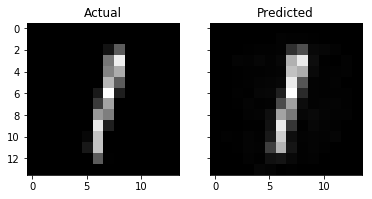

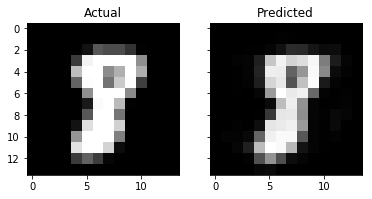

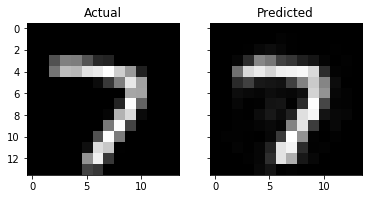

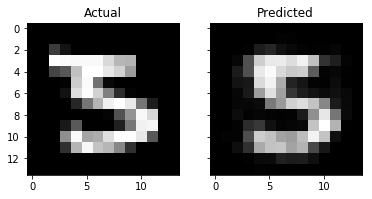

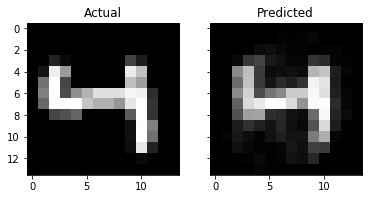

In [6]:
rand_int = np.random.randint(0,X_test.shape[0],size=(1, 5))[0]
for i in range(len(rand_int)):
    Z, Y, S_Z, S_Y = forward_pass(X_test[rand_int[i], :], W_hi, W_jh, b_h, b_o)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.title.set_text('Actual')
    ax1.imshow(np.reshape(X_test[rand_int[i],:], (14,14)), cmap = "gray")
    ax2.title.set_text('Predicted')
    ax2.imshow(np.reshape(S_Y, (14,14)), cmap = "gray")